# Predicting Long-Lived Bugs

# 1. Python Packages e Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline 

plt.style.use('default')
sns.set_context("paper")

In [2]:
def read_metrics_file(metric_file):
    #results_file = 'datasets/20190313191135_eclipse_result_metrics.csv'
    results_file = metric_file
    results = pd.read_csv(results_file)
    rows_and_cols = results.shape
    print('There are {} rows and {} columns.\n'.format(
        rows_and_cols[0], rows_and_cols[1]
        )
    )

    results_information = results.info()

    return results.sort_values('balanced_acc', ascending=False)

def plot_line(data, x, y):
    sns.color_palette("bright")
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    g = sns.FacetGrid(data=data, hue="resampling", col="balancing", col_wrap=2, height=10)
    g = g.map(sns.lineplot, x, y)
    g.set(xlim=(4, 64))
    g.set(xticks=range(4, 64, 4))
    g.add_legend()
    return 

# 2. Project: Eclipse

This eighth experiment has used a dataset of bug reports extracted from Eclipse Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Parameter                                          |                      Value                            |
|----------------------------------------------------|:-----------------------------------------------------:|
| OSS                                                |        eclipse                                        |
| Number of bug reports                              |        8438                                         |
| Days to resolve range                              |   from 0 to 730                                       |
| Number of bug reports within days to resolve range |        7614                                         |
| Textual features                                   | summary + description                                 |
| Number of terms                                    |           200                                         |
| Fixed Threshold                                    |            64                                         |
| Variable threshold range                           |       from 4 to 64 (step 4)                                |
| Method for balancing class                         | none, downsampling (manual), downsampling (R), smote  |
| Classifiers                                        | knn                                                   |
| Resampling techniques                              | none, bootstrap, cv5x2, repeated cv5x2, loocv, loogcv |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **fixed threshold** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 2.1  Evaluation Metrics

In [3]:
results_eclipse = read_metrics_file('datasets/20190313191135_eclipse_result_metrics.csv')
results_eclipse.info()
results_eclipse

There are 384 rows and 24 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 24 columns):
dataset               384 non-null object
classifier            384 non-null object
resampling            384 non-null object
balancing             384 non-null object
threshold             384 non-null int64
fixed_threshold       384 non-null int64
train_size            384 non-null int64
train_size_class_0    384 non-null int64
train_size_class_1    384 non-null int64
test_size             384 non-null int64
test_size_class_0     384 non-null int64
test_size_class_1     384 non-null int64
feature               384 non-null object
n_term                384 non-null int64
tp                    384 non-null int64
fp                    384 non-null int64
tn                    384 non-null int64
fn                    384 non-null int64
acc_class_0           384 non-null float64
acc_class_1           384 non-null float64
balanced_acc          384 non-

,dataset,classifier,resampling,balancing,threshold,fixed_threshold,train_size,train_size_class_0,train_size_class_1,test_size,...,tp,fp,tn,fn,acc_class_0,acc_class_1,balanced_acc,precision,recall,fmeasure
187,eclipse,knn,LGOCV,unbalanced,60,64,5513,3981,1532,1837,...,1097,412,230,98,0.726972,0.701220,0.714096,0.726972,0.917992,0.811391
59,eclipse,knn,boot,unbalanced,60,64,5513,3981,1532,1837,...,1097,412,230,98,0.726972,0.701220,0.714096,0.726972,0.917992,0.811391
123,eclipse,knn,cv,unbalanced,60,64,5513,3981,1532,1837,...,1097,412,230,98,0.726972,0.701220,0.714096,0.726972,0.917992,0.811391
251,eclipse,knn,LOOCV,unbalanced,60,64,5513,3981,1532,1837,...,1098,412,229,98,0.727152,0.700306,0.713729,0.727152,0.918060,0.811530
307,eclipse,knn,none,unbalanced,52,64,5414,3882,1532,1803,...,977,377,316,133,0.721566,0.703786,0.712676,0.721566,0.880180,0.793019
379,eclipse,knn,repeatedcv,unbalanced,60,64,5513,3981,1532,1837,...,1099,411,228,99,0.727815,0.697248,0.712531,0.727815,0.917362,0.811669
315,eclipse,knn,none,unbalanced,60,64,5513,3981,1532,1837,...,1028,378,299,132,0.731152,0.693735,0.712444,0.731152,0.886207,0.801247
115,eclipse,knn,cv,unbalanced,52,64,5414,3882,1532,1803,...,1055,408,238,102,0.721121,0.700000,0.710560,0.721121,0.911841,0.805344
243,eclipse,knn,LOOCV,unbalanced,52,64,5414,3882,1532,1803,...,1054,407,239,103,0.721424,0.698830,0.710127,0.721424,0.910977,0.805195
371,eclipse,knn,repeatedcv,unbalanced,52,64,5414,3882,1532,1803,...,1054,407,239,103,0.721424,0.698830,0.710127,0.721424,0.910977,0.805195


### 2.1.1 Balanced Accuracy versus Threshold

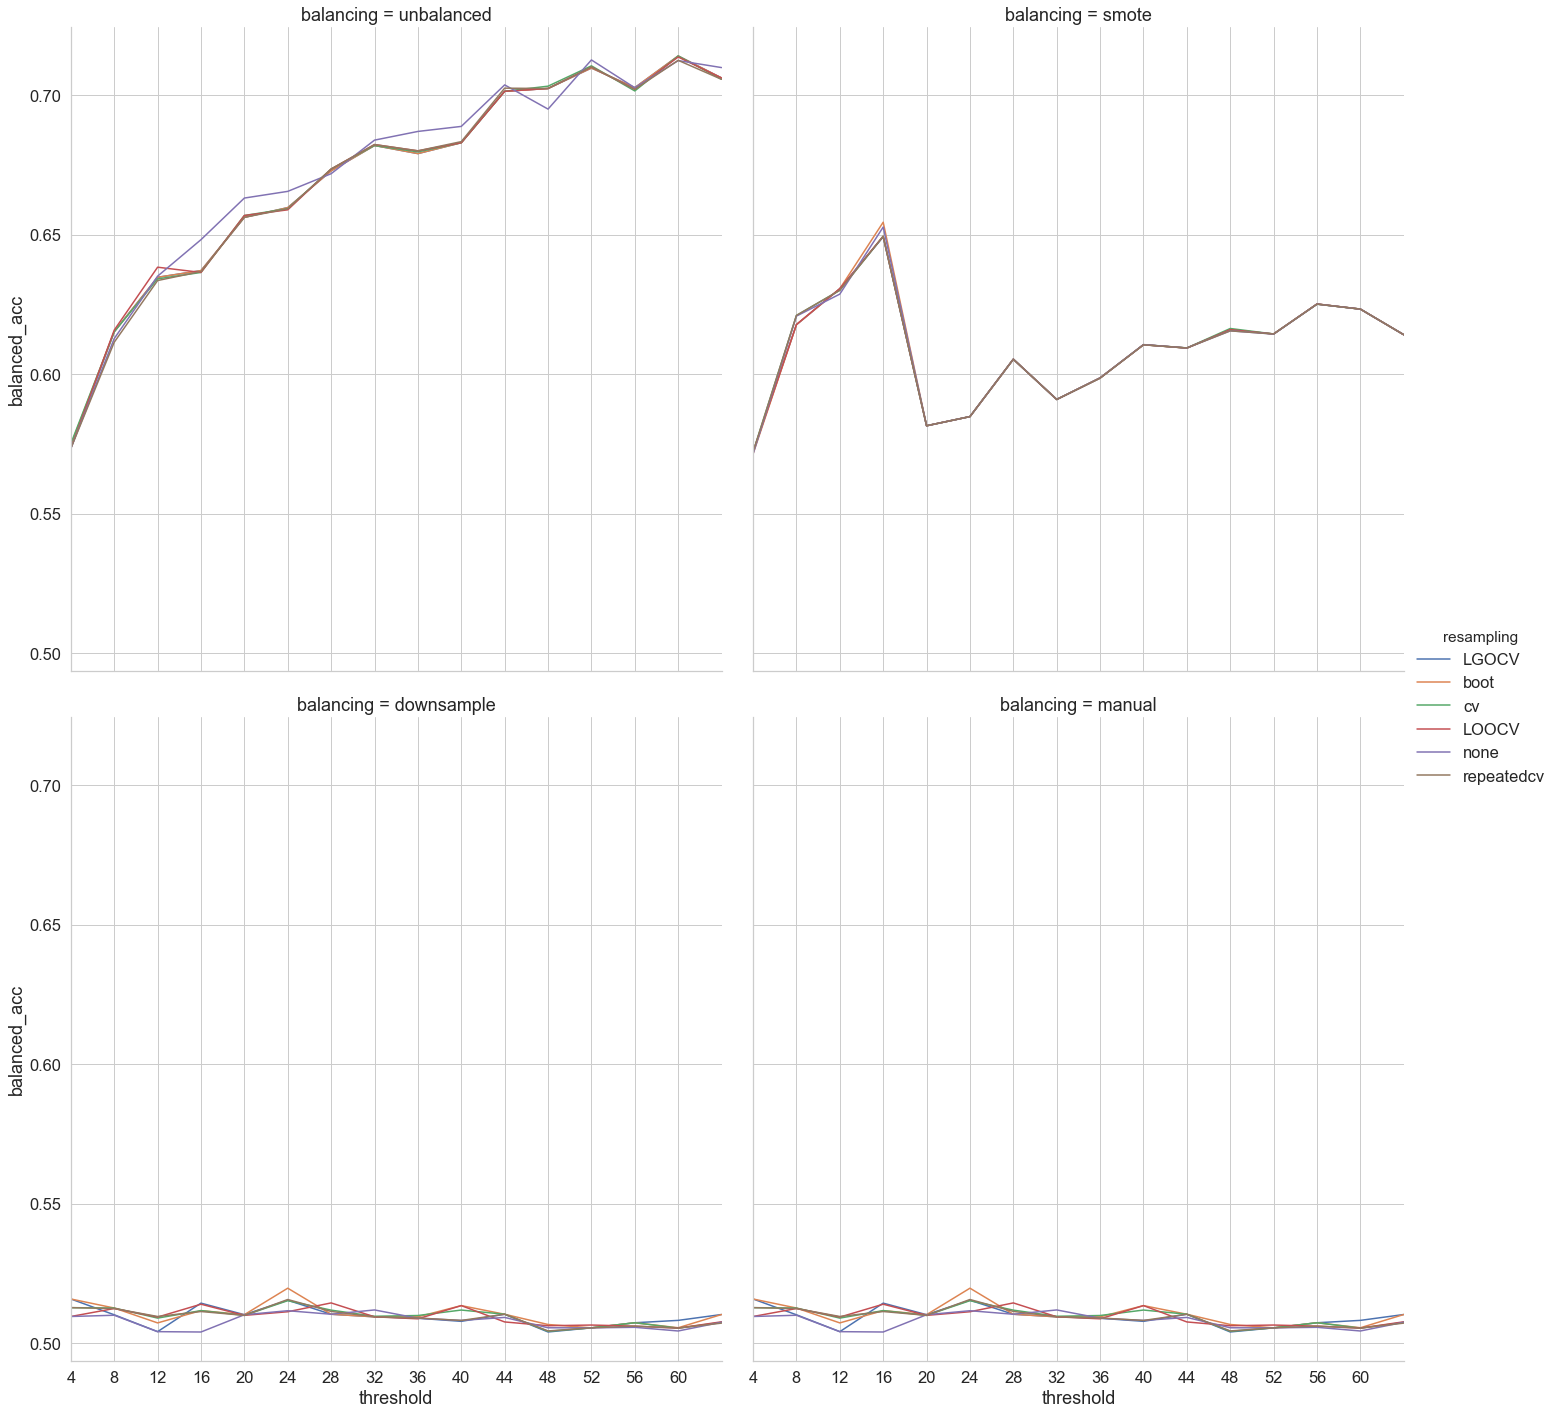

In [4]:
plot_line(results_eclipse, 'threshold', 'balanced_acc')

# 3. Project: FreeDesktop

This eighth experiment has used a dataset of bug reports extracted from Eclipse Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Parameter                                          |                      Value                            |
|----------------------------------------------------|:-----------------------------------------------------:|
| OSS                                                |        freedesktop                                    |
| Number of bug reports                              |        21215                                         |
| Days to resolve range                              |   from 0 to 730                                       |
| Number of bug reports within days to resolve range |        6807                                         |
| Textual features                                   | summary + description                                 |
| Number of terms                                    |           200                                         |
| Fixed Threshold                                    |            64                                         |
| Variable threshold range                           |       from 4 to 64 (step 4)                                |
| Method for balancing class                         | none, downsampling (manual), downsampling (R), smote  |
| Classifiers                                        | knn                                                   |
| Resampling techniques                              | none, bootstrap, cv5x2, repeated cv5x2, loocv, loogcv |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **fixed threshold** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

   ## 3.1 Evaluation Metrics

In [5]:
results_freedesktop = read_metrics_file('datasets/20190316005020_freedesktop_result_metrics.csv')
results_freedesktop.info()
results_freedesktop

There are 384 rows and 24 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 24 columns):
dataset               384 non-null object
classifier            384 non-null object
resampling            384 non-null object
balancing             384 non-null object
threshold             384 non-null int64
fixed_threshold       384 non-null int64
train_size            384 non-null int64
train_size_class_0    384 non-null int64
train_size_class_1    384 non-null int64
test_size             384 non-null int64
test_size_class_0     384 non-null int64
test_size_class_1     384 non-null int64
feature               384 non-null object
n_term                384 non-null int64
tp                    384 non-null int64
fp                    384 non-null int64
tn                    384 non-null int64
fn                    384 non-null int64
acc_class_0           384 non-null float64
acc_class_1           384 non-null float64
balanced_acc          384 non-

,dataset,classifier,resampling,balancing,threshold,fixed_threshold,train_size,train_size_class_0,train_size_class_1,test_size,...,tp,fp,tn,fn,acc_class_0,acc_class_1,balanced_acc,precision,recall,fmeasure
255,freedesktop,knn,LOOCV,unbalanced,64,64,5681,3731,1950,1892,...,1049,533,194,116,0.663085,0.625806,0.644446,0.663085,0.900429,0.763742
383,freedesktop,knn,repeatedcv,unbalanced,64,64,5681,3731,1950,1892,...,1050,533,193,116,0.663298,0.624595,0.643947,0.663298,0.900515,0.763914
127,freedesktop,knn,cv,unbalanced,64,64,5681,3731,1950,1892,...,1050,533,193,116,0.663298,0.624595,0.643947,0.663298,0.900515,0.763914
191,freedesktop,knn,LGOCV,unbalanced,64,64,5681,3731,1950,1892,...,1050,533,193,116,0.663298,0.624595,0.643947,0.663298,0.900515,0.763914
63,freedesktop,knn,boot,unbalanced,64,64,5681,3731,1950,1892,...,1050,533,193,116,0.663298,0.624595,0.643947,0.663298,0.900515,0.763914
311,freedesktop,knn,none,unbalanced,56,64,5571,3621,1950,1856,...,950,495,257,154,0.657439,0.625304,0.641372,0.657439,0.860507,0.745390
315,freedesktop,knn,none,unbalanced,60,64,5635,3685,1950,1877,...,968,481,260,168,0.668047,0.607477,0.637762,0.668047,0.852113,0.748936
246,freedesktop,knn,LOOCV,smote,56,64,5571,3621,1950,1856,...,1014,528,193,121,0.657588,0.614650,0.636119,0.657588,0.893392,0.757564
374,freedesktop,knn,repeatedcv,smote,56,64,5571,3621,1950,1856,...,1015,528,192,121,0.657809,0.613419,0.635614,0.657809,0.893486,0.757745
182,freedesktop,knn,LGOCV,smote,56,64,5571,3621,1950,1856,...,1015,528,192,121,0.657809,0.613419,0.635614,0.657809,0.893486,0.757745


### 2.1.1 Balanced Accuracy versus Threshold

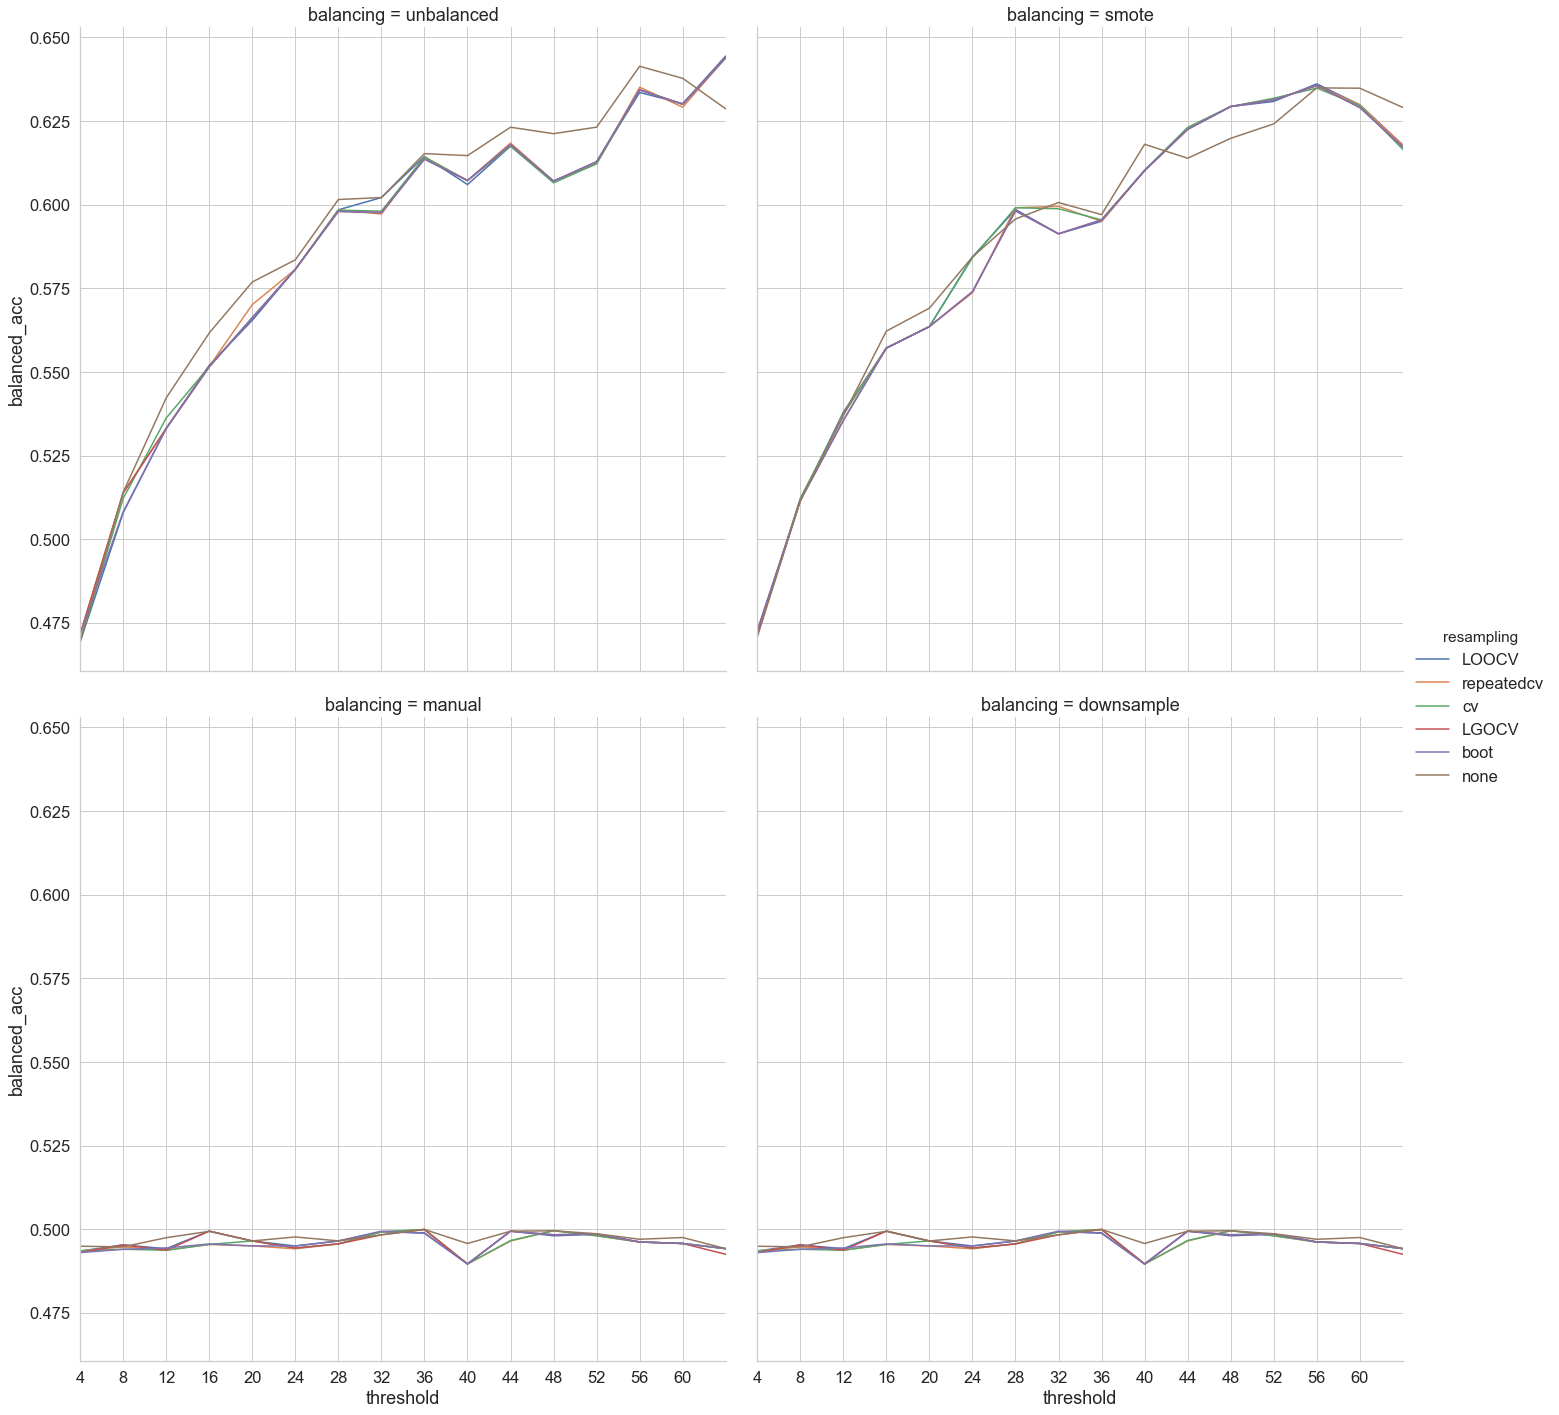

In [6]:
plot_line(results_freedesktop, 'threshold', 'balanced_acc')

# 4 Project: Gnome

This eighth experiment has used a dataset of bug reports extracted from Gnome Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Parameter                                          |                      Value                            |
|----------------------------------------------------|:-----------------------------------------------------:|
| OSS                                                |        Gnome                                          |
| Number of bug reports                              |        31917                                         |
| Days to resolve range                              |   from 0 to 730                                       |
| Number of bug reports within days to resolve range |        4261                                         |
| Textual features                                   | summary + description                                 |
| Number of terms                                    |           200                                         |
| Fixed Threshold                                    |            64                                         |
| Variable threshold range                           |       from 4 to 64 (step 4)                                |
| Method for balancing class                         | none, downsampling (manual), downsampling (R), smote  |
| Classifiers                                        | knn                                                   |
| Resampling techniques                              | none, bootstrap, cv5x2, repeated cv5x2, loocv, loogcv |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **fixed threshold** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 4.1 Evaluation Metrics

In [7]:
results_gnome = read_metrics_file('datasets/20190316234709_gnome_result_metrics.csv')
results_gnome.info()
results_gnome

There are 384 rows and 24 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 24 columns):
dataset               384 non-null object
classifier            384 non-null object
resampling            384 non-null object
balancing             384 non-null object
threshold             384 non-null int64
fixed_threshold       384 non-null int64
train_size            384 non-null int64
train_size_class_0    384 non-null int64
train_size_class_1    384 non-null int64
test_size             384 non-null int64
test_size_class_0     384 non-null int64
test_size_class_1     384 non-null int64
feature               384 non-null object
n_term                384 non-null int64
tp                    384 non-null int64
fp                    384 non-null int64
tn                    384 non-null int64
fn                    384 non-null int64
acc_class_0           384 non-null float64
acc_class_1           384 non-null float64
balanced_acc          384 non-

,dataset,classifier,resampling,balancing,threshold,fixed_threshold,train_size,train_size_class_0,train_size_class_1,test_size,...,tp,fp,tn,fn,acc_class_0,acc_class_1,balanced_acc,precision,recall,fmeasure
319,gnome,knn,none,unbalanced,64,64,3583,2157,1426,1194,...,478,203,241,272,0.701909,0.469786,0.585847,0.701909,0.637333,0.668064
315,gnome,knn,none,unbalanced,60,64,3546,2120,1426,1181,...,478,187,228,288,0.718797,0.441860,0.580329,0.718797,0.624021,0.668064
318,gnome,knn,none,smote,64,64,3583,2157,1426,1194,...,501,190,218,285,0.725036,0.433400,0.579218,0.725036,0.637405,0.678402
314,gnome,knn,none,smote,60,64,3546,2120,1426,1181,...,487,186,219,289,0.723626,0.431102,0.577364,0.723626,0.627577,0.672188
187,gnome,knn,LGOCV,unbalanced,60,64,3546,2120,1426,1181,...,489,192,217,283,0.718062,0.434000,0.576031,0.718062,0.633420,0.673090
379,gnome,knn,repeatedcv,unbalanced,60,64,3546,2120,1426,1181,...,489,192,217,283,0.718062,0.434000,0.576031,0.718062,0.633420,0.673090
123,gnome,knn,cv,unbalanced,60,64,3546,2120,1426,1181,...,489,192,217,283,0.718062,0.434000,0.576031,0.718062,0.633420,0.673090
251,gnome,knn,LOOCV,unbalanced,60,64,3546,2120,1426,1181,...,489,192,217,283,0.718062,0.434000,0.576031,0.718062,0.633420,0.673090
383,gnome,knn,repeatedcv,unbalanced,64,64,3583,2157,1426,1194,...,510,211,209,264,0.707351,0.441860,0.574606,0.707351,0.658915,0.682274
255,gnome,knn,LOOCV,unbalanced,64,64,3583,2157,1426,1194,...,511,211,208,264,0.707756,0.440678,0.574217,0.707756,0.659355,0.682699


### 4.1.1 Balanced Accuracy versus Threshold

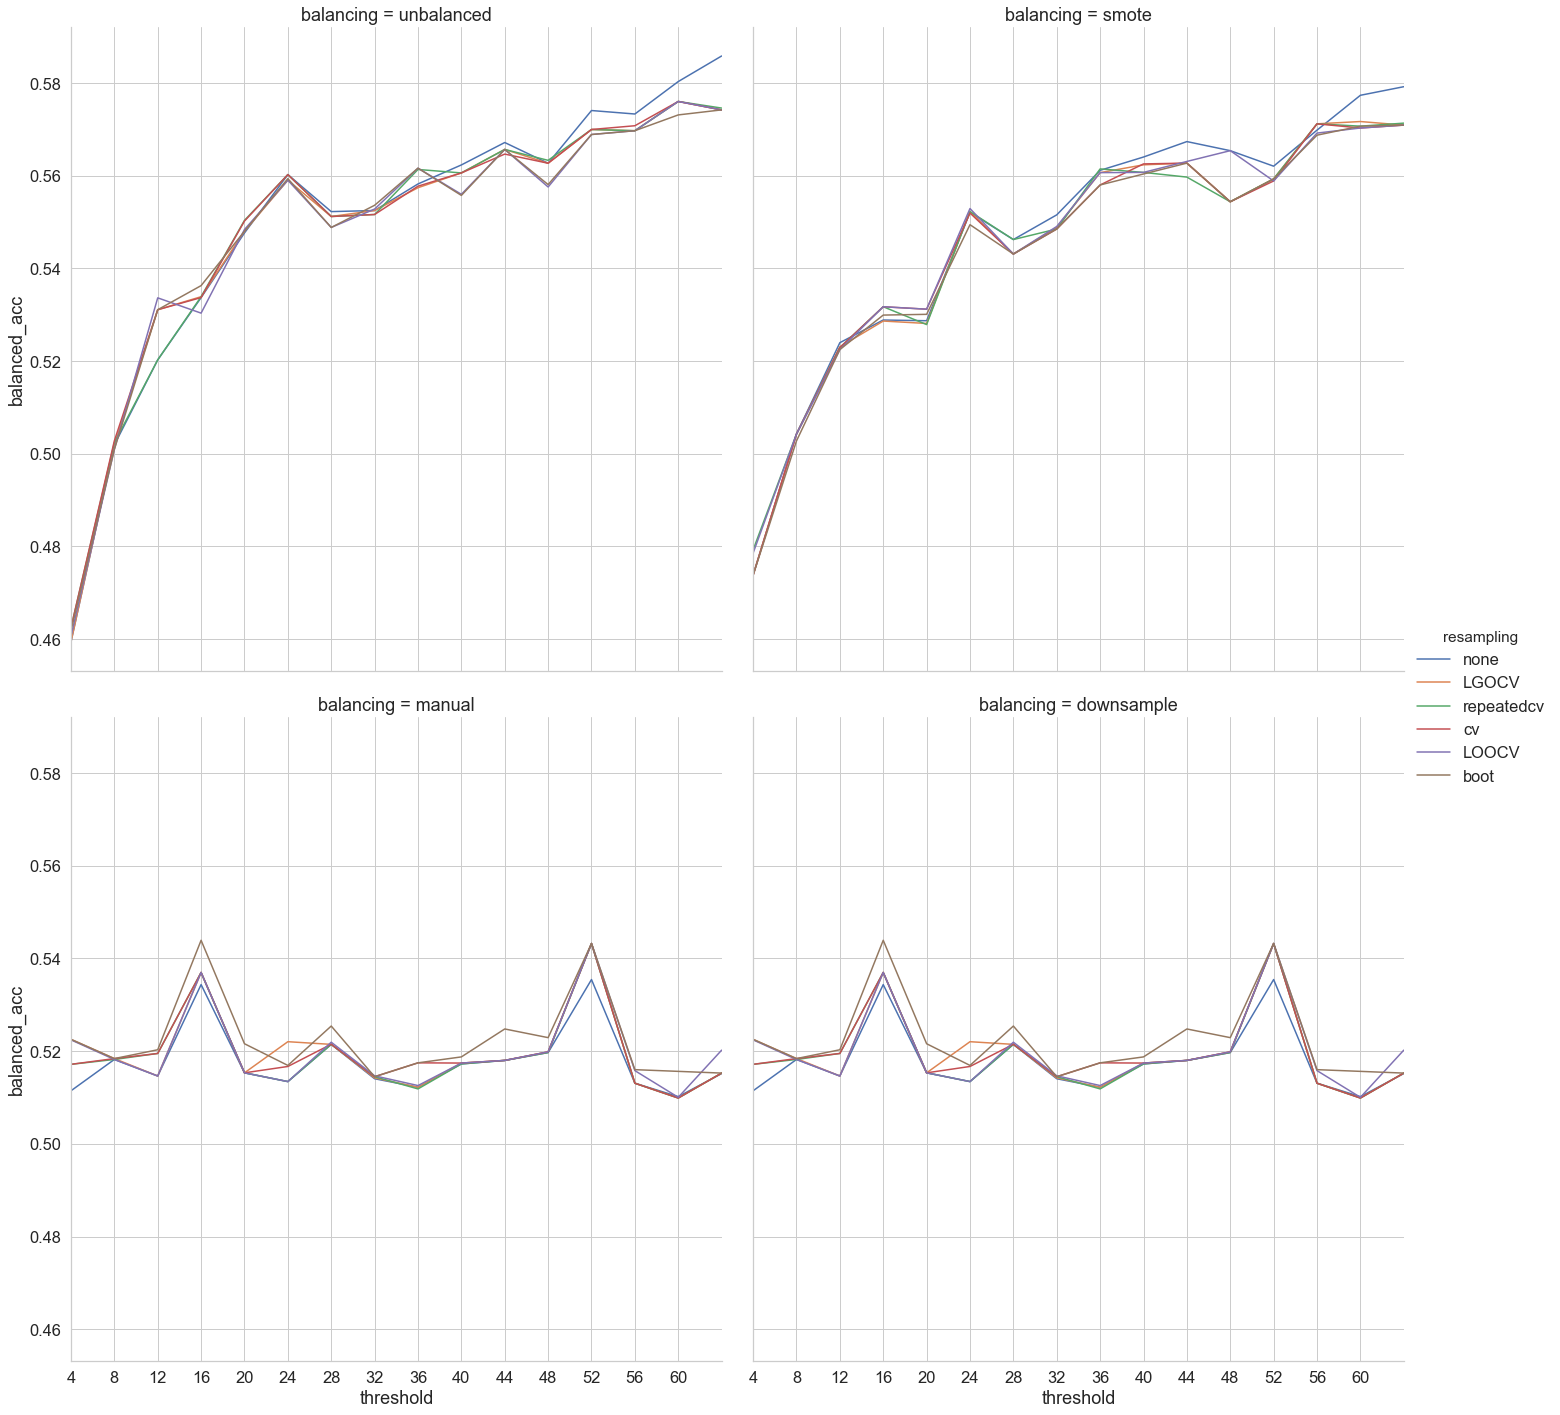

In [8]:
plot_line(results_gnome, 'threshold', 'balanced_acc')

# 5. Project: Mozilla

This eighth experiment has used a dataset of bug reports extracted from Mozilla Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Parameter                                          |                      Value                            |
|----------------------------------------------------|:-----------------------------------------------------:|
| OSS                                                |        Mozilla                                          |
| Number of bug reports                              |        4933                                         |
| Days to resolve range                              |   from 0 to 730                                       |
| Number of bug reports within days to resolve range |        1917                                         |
| Textual features                                   | summary + description                                 |
| Number of terms                                    |           200                                         |
| Fixed Threshold                                    |            64                                         |
| Variable threshold range                           |       from 4 to 64 (step 4)                                |
| Method for balancing class                         | none, downsampling (manual), downsampling (R), smote  |
| Classifiers                                        | knn                                                   |
| Resampling techniques                              | none, bootstrap, cv5x2, repeated cv5x2, loocv, loogcv |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **fixed threshold** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 5.1 Evaluation Metrics

In [9]:
results_mozilla = read_metrics_file('datasets/20190317111304_mozilla_result_metrics.csv')
results_mozilla.info()
results_mozilla

There are 384 rows and 24 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 24 columns):
dataset               384 non-null object
classifier            384 non-null object
resampling            384 non-null object
balancing             384 non-null object
threshold             384 non-null int64
fixed_threshold       384 non-null int64
train_size            384 non-null int64
train_size_class_0    384 non-null int64
train_size_class_1    384 non-null int64
test_size             384 non-null int64
test_size_class_0     384 non-null int64
test_size_class_1     384 non-null int64
feature               384 non-null object
n_term                384 non-null int64
tp                    384 non-null int64
fp                    384 non-null int64
tn                    384 non-null int64
fn                    384 non-null int64
acc_class_0           384 non-null float64
acc_class_1           384 non-null float64
balanced_acc          384 non-

,dataset,classifier,resampling,balancing,threshold,fixed_threshold,train_size,train_size_class_0,train_size_class_1,test_size,...,tp,fp,tn,fn,acc_class_0,acc_class_1,balanced_acc,precision,recall,fmeasure
315,mozilla,knn,none,unbalanced,60,64,1559,1064,495,519,...,250,108,104,57,0.698324,0.645963,0.672143,0.698324,0.814332,0.751880
311,mozilla,knn,none,unbalanced,56,64,1540,1045,495,513,...,261,118,87,47,0.688654,0.649254,0.668954,0.688654,0.847403,0.759825
123,mozilla,knn,cv,unbalanced,60,64,1559,1064,495,519,...,275,120,79,45,0.696203,0.637097,0.666650,0.696203,0.859375,0.769231
187,mozilla,knn,LGOCV,unbalanced,60,64,1559,1064,495,519,...,275,120,79,45,0.696203,0.637097,0.666650,0.696203,0.859375,0.769231
251,mozilla,knn,LOOCV,unbalanced,60,64,1559,1064,495,519,...,275,120,79,45,0.696203,0.637097,0.666650,0.696203,0.859375,0.769231
379,mozilla,knn,repeatedcv,unbalanced,60,64,1559,1064,495,519,...,275,120,79,45,0.696203,0.637097,0.666650,0.696203,0.859375,0.769231
59,mozilla,knn,boot,unbalanced,60,64,1559,1064,495,519,...,275,120,79,45,0.696203,0.637097,0.666650,0.696203,0.859375,0.769231
294,mozilla,knn,none,smote,40,64,1461,966,495,487,...,236,124,86,41,0.655556,0.677165,0.666360,0.655556,0.851986,0.740973
298,mozilla,knn,none,smote,44,64,1485,990,495,494,...,225,98,104,67,0.696594,0.608187,0.652391,0.696594,0.770548,0.731707
383,mozilla,knn,repeatedcv,unbalanced,64,64,1574,1079,495,524,...,310,133,49,32,0.699774,0.604938,0.652356,0.699774,0.906433,0.789809


### 5.1.1 Balanced Accuracy versus Threshold

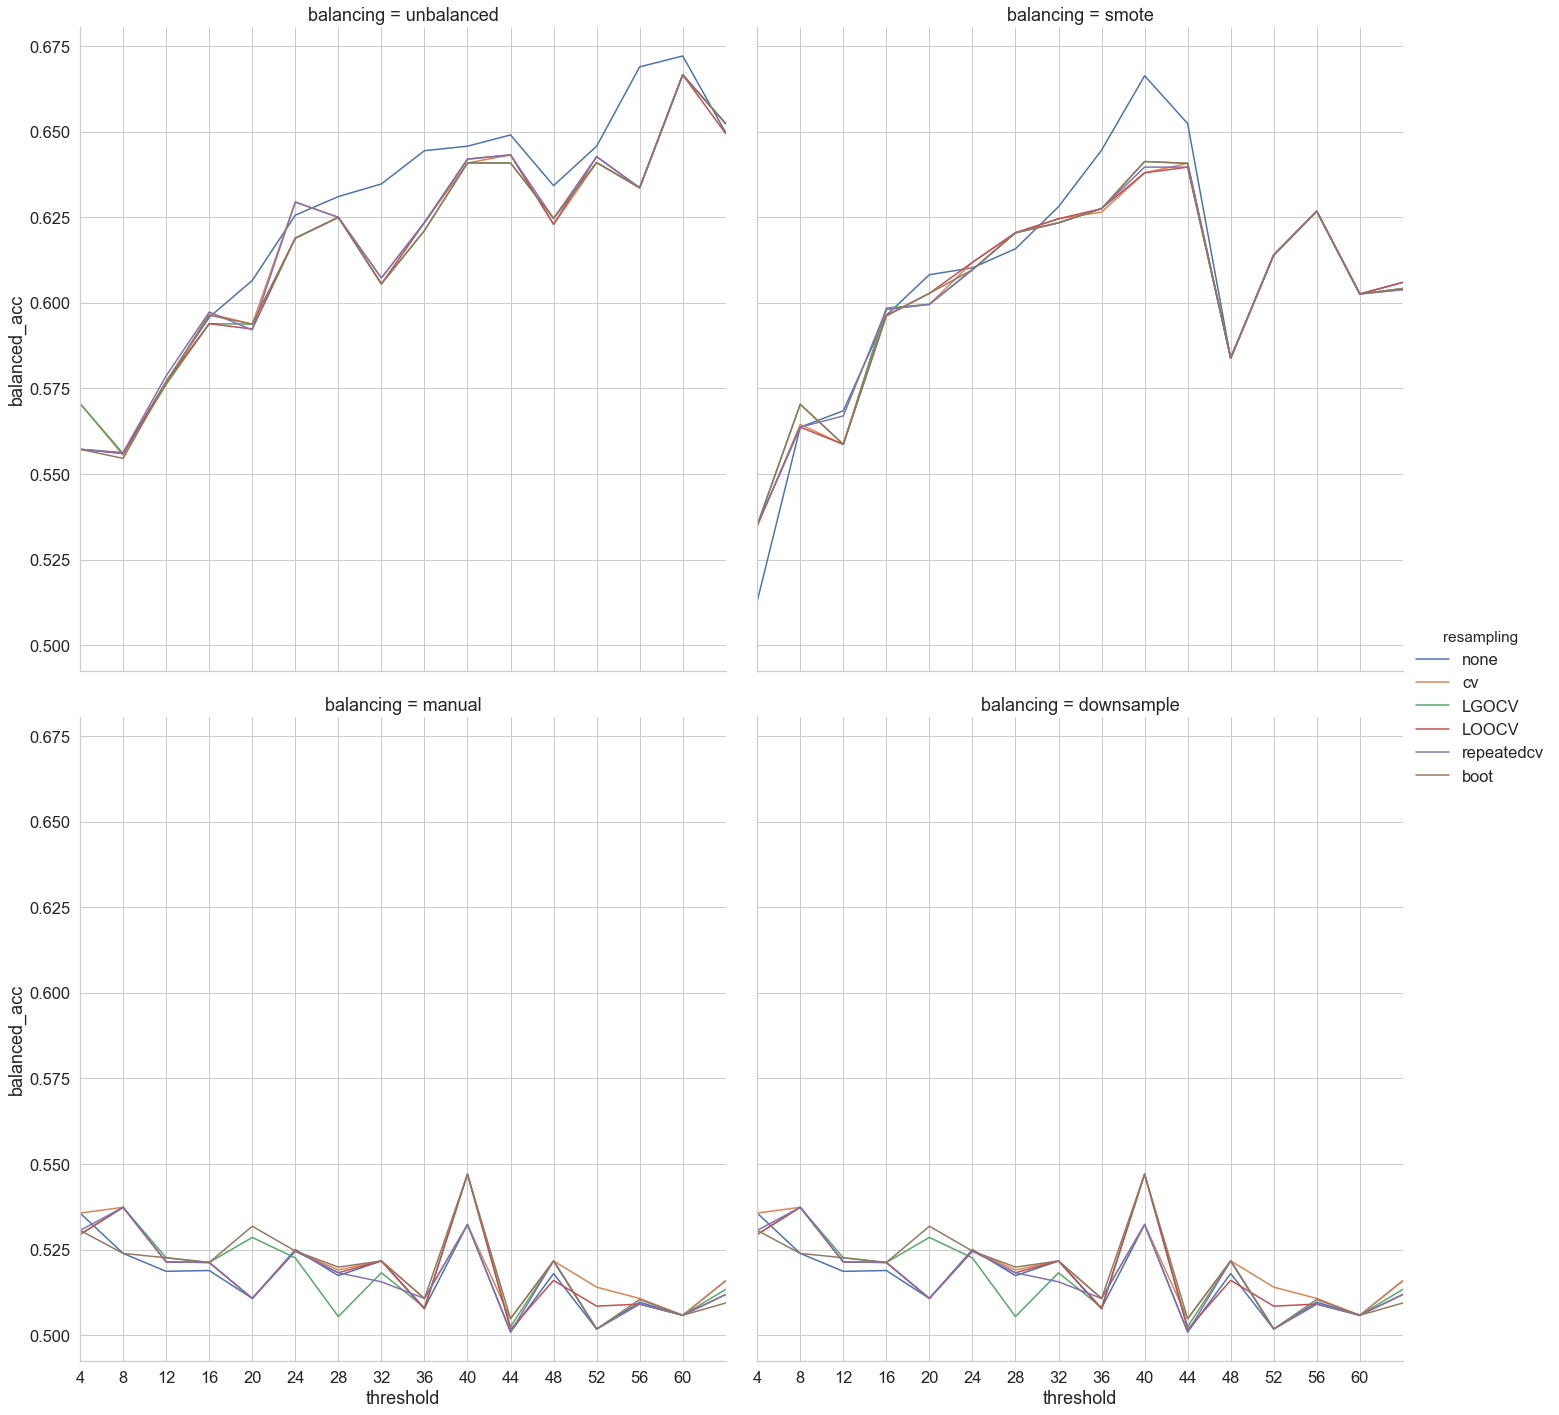

In [10]:
plot_line(results_mozilla, 'threshold', 'balanced_acc')

# 6. Project: Netbeans

This eighth experiment has used a dataset of bug reports extracted from Mozilla Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Parameter                                          |                      Value                            |
|----------------------------------------------------|:-----------------------------------------------------:|
| OSS                                                |        Netbeans                                          |
| Number of bug reports                              |        20097                                         |
| Days to resolve range                              |   from 0 to 730                                       |
| Number of bug reports within days to resolve range |        5777                                         |
| Textual features                                   | summary + description                                 |
| Number of terms                                    |           200                                         |
| Fixed Threshold                                    |            64                                         |
| Variable threshold range                           |       from 4 to 64 (step 4)                                |
| Method for balancing class                         | none, downsampling (manual), downsampling (R), smote  |
| Classifiers                                        | knn                                                   |
| Resampling techniques                              | none, bootstrap, cv5x2, repeated cv5x2, loocv, loogcv |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **fixed threshold** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 6.1 Evaluation Metrics

In [11]:
results_netbeans = read_metrics_file('datasets/20190317205949_netbeans_result_metrics.csv')
results_netbeans.info()
results_netbeans

There are 384 rows and 24 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 24 columns):
dataset               384 non-null object
classifier            384 non-null object
resampling            384 non-null object
balancing             384 non-null object
threshold             384 non-null int64
fixed_threshold       384 non-null int64
train_size            384 non-null int64
train_size_class_0    384 non-null int64
train_size_class_1    384 non-null int64
test_size             384 non-null int64
test_size_class_0     384 non-null int64
test_size_class_1     384 non-null int64
feature               384 non-null object
n_term                384 non-null int64
tp                    384 non-null int64
fp                    384 non-null int64
tn                    384 non-null int64
fn                    384 non-null int64
acc_class_0           384 non-null float64
acc_class_1           384 non-null float64
balanced_acc          384 non-

,dataset,classifier,resampling,balancing,threshold,fixed_threshold,train_size,train_size_class_0,train_size_class_1,test_size,...,tp,fp,tn,fn,acc_class_0,acc_class_1,balanced_acc,precision,recall,fmeasure
319,netbeans,knn,none,unbalanced,64,64,4969,3559,1410,1655,...,956,378,230,91,0.716642,0.716511,0.716576,0.716642,0.913085,0.803024
311,netbeans,knn,none,unbalanced,56,64,4875,3465,1410,1623,...,894,356,260,113,0.715200,0.697051,0.706125,0.715200,0.887786,0.792202
299,netbeans,knn,none,unbalanced,44,64,4699,3289,1410,1565,...,863,371,233,98,0.699352,0.703927,0.701640,0.699352,0.898023,0.786333
307,netbeans,knn,none,unbalanced,52,64,4824,3414,1410,1606,...,883,350,254,119,0.716139,0.680965,0.698552,0.716139,0.881238,0.790157
179,netbeans,knn,LGOCV,unbalanced,52,64,4824,3414,1410,1606,...,953,383,184,86,0.713323,0.681481,0.697402,0.713323,0.917228,0.802526
51,netbeans,knn,boot,unbalanced,52,64,4824,3414,1410,1606,...,953,383,184,86,0.713323,0.681481,0.697402,0.713323,0.917228,0.802526
371,netbeans,knn,repeatedcv,unbalanced,52,64,4824,3414,1410,1606,...,953,383,184,86,0.713323,0.681481,0.697402,0.713323,0.917228,0.802526
375,netbeans,knn,repeatedcv,unbalanced,56,64,4875,3465,1410,1623,...,948,369,206,100,0.719818,0.673203,0.696510,0.719818,0.904580,0.801691
183,netbeans,knn,LGOCV,unbalanced,56,64,4875,3465,1410,1623,...,950,370,204,99,0.719697,0.673267,0.696482,0.719697,0.905624,0.802026
55,netbeans,knn,boot,unbalanced,56,64,4875,3465,1410,1623,...,950,370,204,99,0.719697,0.673267,0.696482,0.719697,0.905624,0.802026


### 6.1.1 Balanced Accuracy versus Threshold

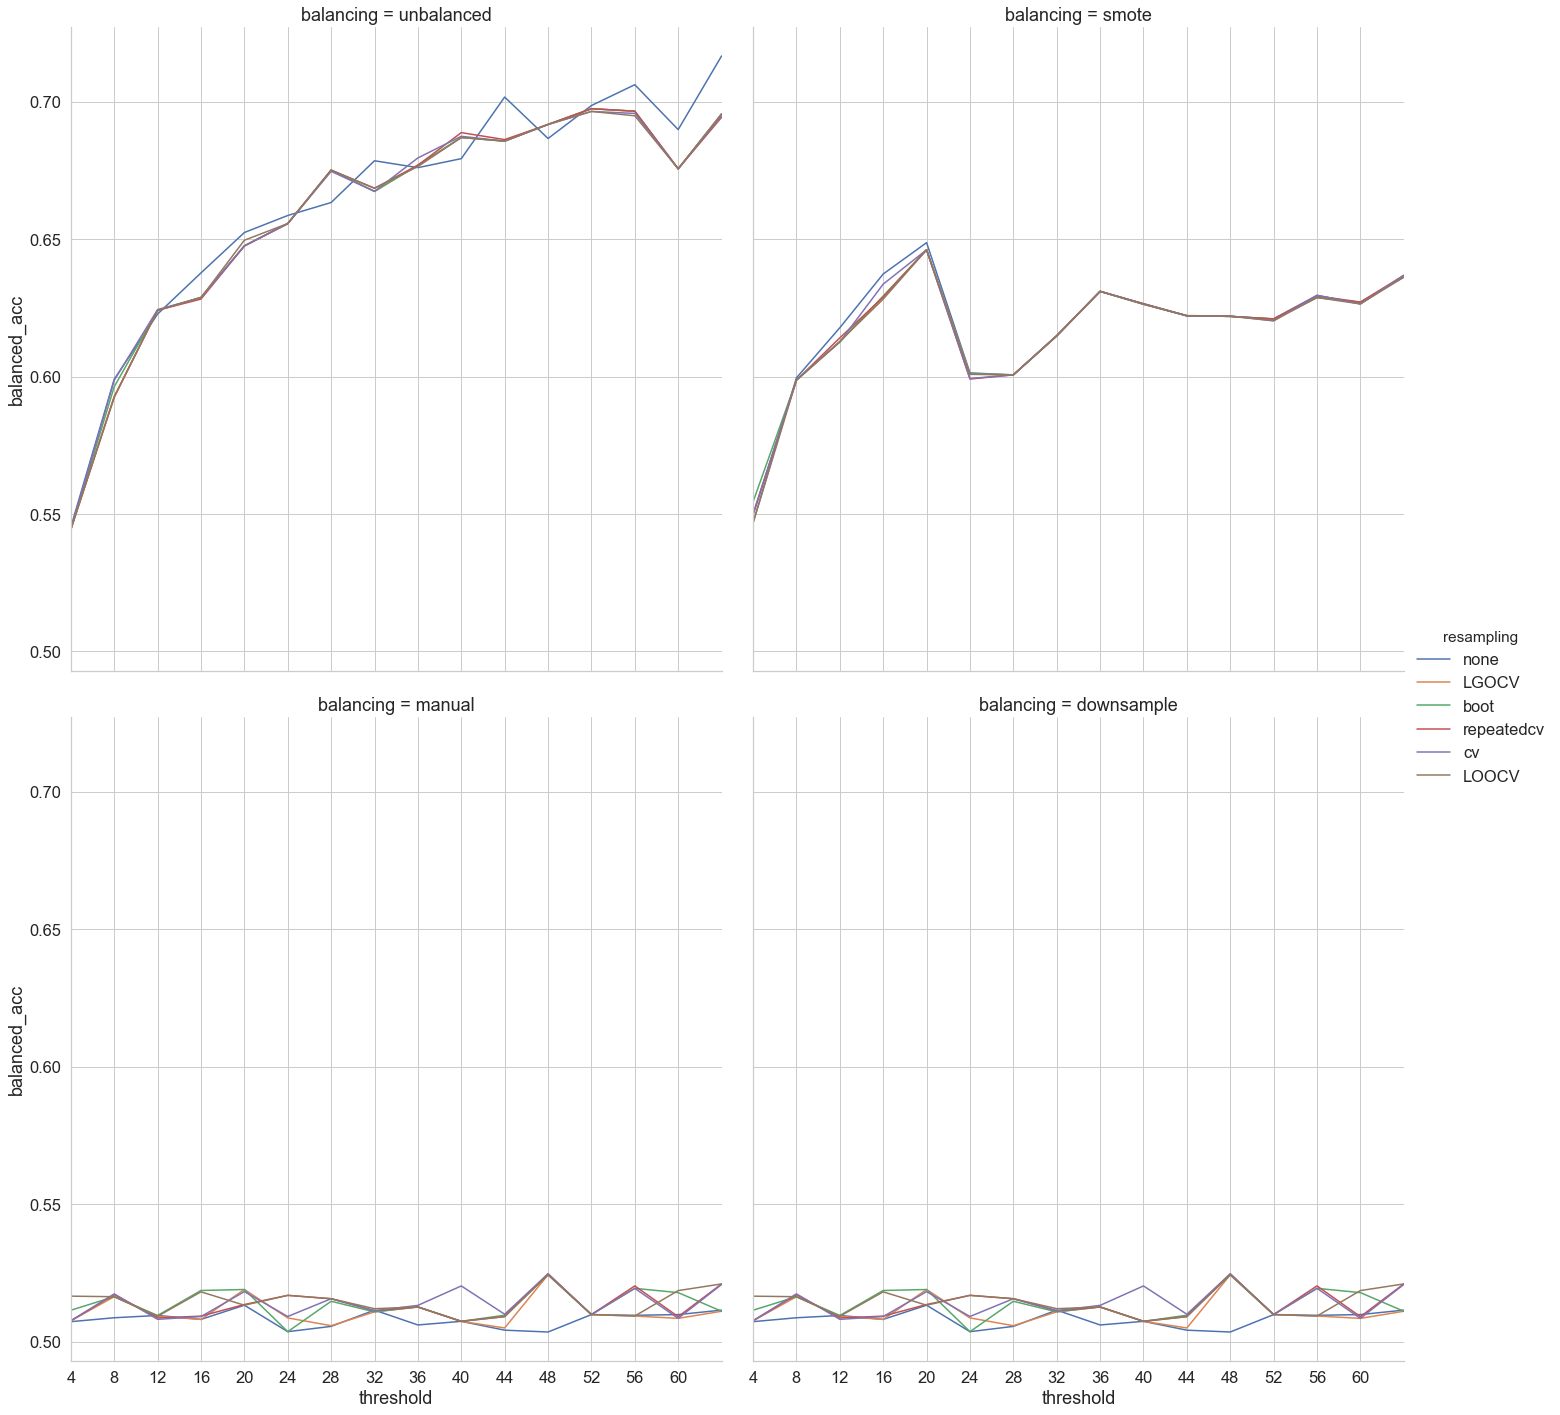

In [12]:
plot_line(results_netbeans, 'threshold', 'balanced_acc')

# 7. Project: WineHQ

This eighth experiment has used a dataset of bug reports extracted from WineHQ Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Parameter                                          |                      Value                            |
|----------------------------------------------------|:-----------------------------------------------------:|
| OSS                                                |        WineHQ                                          |
| Number of bug reports                              |        33230                                         |
| Days to resolve range                              |   from 0 to 730                                       |
| Number of bug reports within days to resolve range |        4850                                         |
| Textual features                                   | summary + description                                 |
| Number of terms                                    |           200                                         |
| Fixed Threshold                                    |            64                                         |
| Variable threshold range                           |       from 4 to 64 (step 4)                                |
| Method for balancing class                         | none, downsampling (manual), downsampling (R), smote  |
| Classifiers                                        | knn                                                   |
| Resampling techniques                              | none, bootstrap, cv5x2, repeated cv5x2, loocv, loogcv |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **fixed threshold** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 7.1 Evaluation Metrics

In [13]:
results_winehq = read_metrics_file('datasets/20190318174932_winehq_result_metrics.csv')
results_winehq.info()
results_winehq

There are 384 rows and 24 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 24 columns):
dataset               384 non-null object
classifier            384 non-null object
resampling            384 non-null object
balancing             384 non-null object
threshold             384 non-null int64
fixed_threshold       384 non-null int64
train_size            384 non-null int64
train_size_class_0    384 non-null int64
train_size_class_1    384 non-null int64
test_size             384 non-null int64
test_size_class_0     384 non-null int64
test_size_class_1     384 non-null int64
feature               384 non-null object
n_term                384 non-null int64
tp                    384 non-null int64
fp                    384 non-null int64
tn                    384 non-null int64
fn                    384 non-null int64
acc_class_0           384 non-null float64
acc_class_1           384 non-null float64
balanced_acc          384 non-

,dataset,classifier,resampling,balancing,threshold,fixed_threshold,train_size,train_size_class_0,train_size_class_1,test_size,...,tp,fp,tn,fn,acc_class_0,acc_class_1,balanced_acc,precision,recall,fmeasure
212,winehq,knn,LOOCV,downsample,24,64,3286,1643,1643,1094,...,328,295,219,252,0.526485,0.464968,0.495726,0.526485,0.565517,0.545303
213,winehq,knn,LOOCV,manual,24,64,3286,1643,1643,1094,...,328,295,219,252,0.526485,0.464968,0.495726,0.526485,0.565517,0.545303
293,winehq,knn,none,manual,40,64,3768,1884,1884,1254,...,374,331,253,296,0.530496,0.460838,0.495667,0.530496,0.558209,0.544000
292,winehq,knn,none,downsample,40,64,3768,1884,1884,1254,...,374,331,253,296,0.530496,0.460838,0.495667,0.530496,0.558209,0.544000
340,winehq,knn,repeatedcv,downsample,24,64,3286,1643,1643,1094,...,328,294,219,253,0.527331,0.463983,0.495657,0.527331,0.564544,0.545303
341,winehq,knn,repeatedcv,manual,24,64,3286,1643,1643,1094,...,328,294,219,253,0.527331,0.463983,0.495657,0.527331,0.564544,0.545303
276,winehq,knn,none,downsample,24,64,3286,1643,1643,1094,...,328,293,219,254,0.528180,0.463002,0.495591,0.528180,0.563574,0.545303
277,winehq,knn,none,manual,24,64,3286,1643,1643,1094,...,328,293,219,254,0.528180,0.463002,0.495591,0.528180,0.563574,0.545303
229,winehq,knn,LOOCV,manual,40,64,3768,1884,1884,1254,...,381,342,246,285,0.526971,0.463277,0.495124,0.526971,0.572072,0.548596
228,winehq,knn,LOOCV,downsample,40,64,3768,1884,1884,1254,...,381,342,246,285,0.526971,0.463277,0.495124,0.526971,0.572072,0.548596


### 7.1.1 Balanced Accuracy versus Threshold

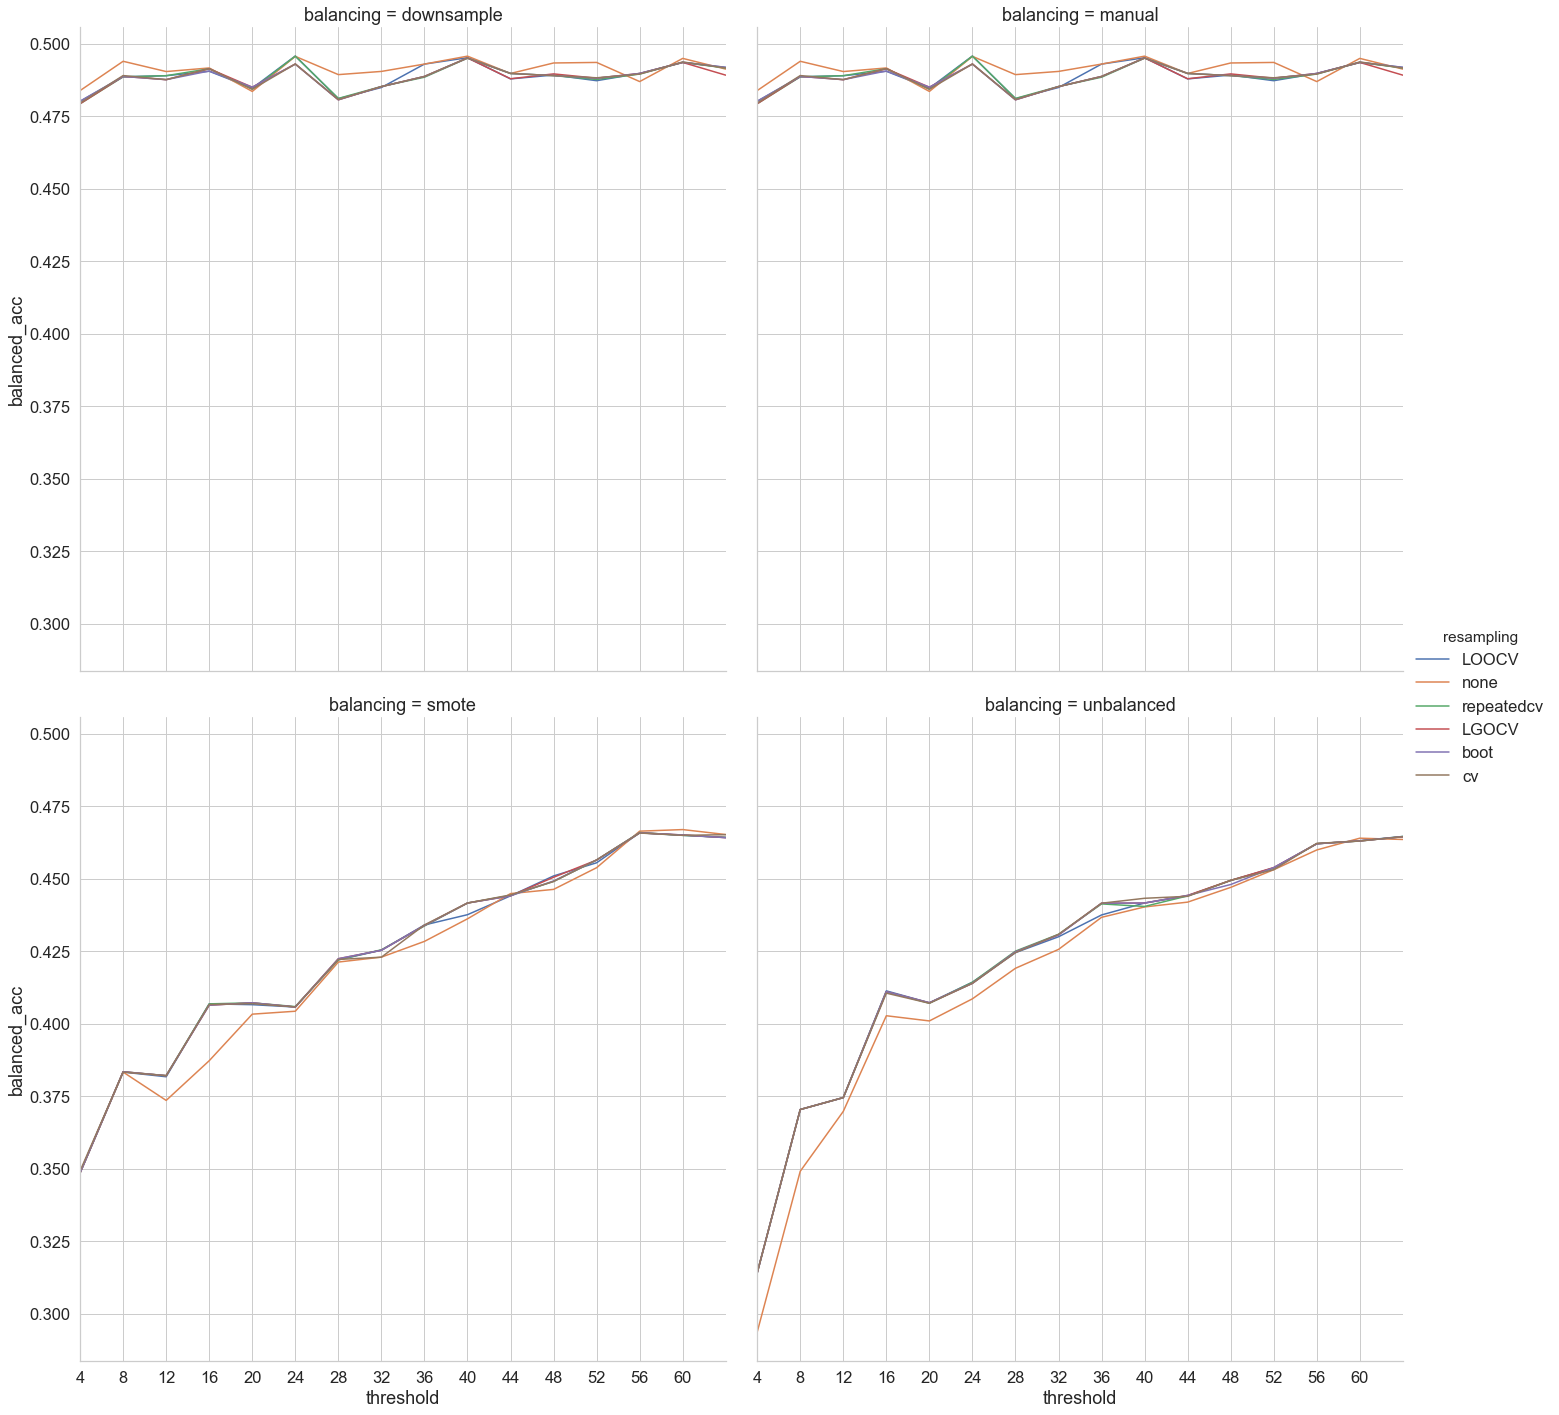

In [14]:
plot_line(results_winehq, 'threshold', 'balanced_acc')